# Part II - Communicate Data Findings: Prosper Loan Dataset
## by Hammed Jimoh


## Investigation Overview


> In this investigation, I want to check the relationship between Borrower's rate and other variables in the datasets. The main focus would be on but not limited to Loan original amount, borrower's monthly income, employment status and Loan term. 

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After the necessary data wrangling processes, part of the dataset having 109,535 rows and 17 columns was explored. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('df_loan.csv')

df_loan['year'] = pd.DatetimeIndex(df_loan['ListingCreationDate']).year

df_loan.head()


,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),Occupation,IsBorrowerHomeowner,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors,year
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,Other,True,Self-employed,640.0,659.0,3083.333333,9425,330.43,258,2007
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,Professional,False,Employed,680.0,699.0,6125.000000,10000,318.93,1,2014
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0,Other,False,Not available,480.0,499.0,2083.333333,3001,123.32,41,2007
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,Skilled Labor,True,Employed,800.0,819.0,2875.000000,10000,321.45,158,2012
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,Executive,True,Employed,680.0,699.0,9583.333333,15000,563.97,20,2013


In [3]:
#funtion to plot a labeled histogram

def histogram(feature, Bins):
    '''
    Bins: set the bins of the histogram
    '''
    df_loan[feature].hist(bins = Bins)
    plt.axvline(x = df_loan[feature].mean(), color = 'red')
    name = str()
    plt.title('Distribution of {}'.format(df_loan[[feature]].columns[0]))
    plt.xlabel(df_loan[[feature]].columns[0])
    plt.ylabel('Frequency')

## Distribution of key variables

> Loan Original Amount, Stated Monthly Income and Monthly Loan Payment are unimodal and skewed right. Majority of the borrowers took loan less than 5000 and the overall data has an average of 8500 in value. A good percentage of them receive an average salary of 5500 and repay around 275 every month. These loans came from 50 investors on average.


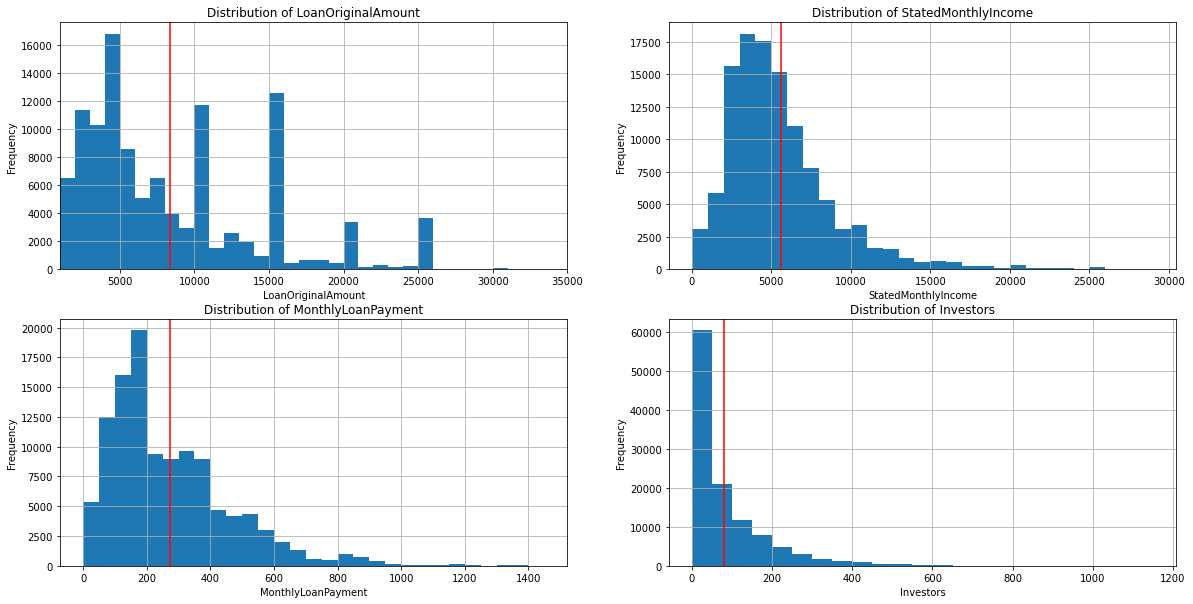

In [4]:
plt.figure(figsize = [20, 10]) 

plt.subplot(2,2,1)
# Visualize the distribution of the Loan original amount
Binsize = np.arange(0,35000, 1000)
histogram('LoanOriginalAmount', Binsize)
plt.xlim(1000, 35000);


plt.subplot(2,2,2)
# Visualize the distribution of the stated monthly income
Binsize = np.arange(0,30000, 1000)
histogram('StatedMonthlyIncome', Binsize)

plt.subplot(2,2,3)
# Check the distribution of monthly loan payment
Binsize = np.arange(0,1500, 50)
histogram('MonthlyLoanPayment', Binsize)

plt.subplot(2,2,4)
Binsize = np.arange(0,df_loan['Investors'].max(), 50)
histogram('Investors', Binsize)

## What impact does loan original amount, stated monthly income, investors and year has on borrower's rate?

> They all seem to have negative correlation on borrower's rate.

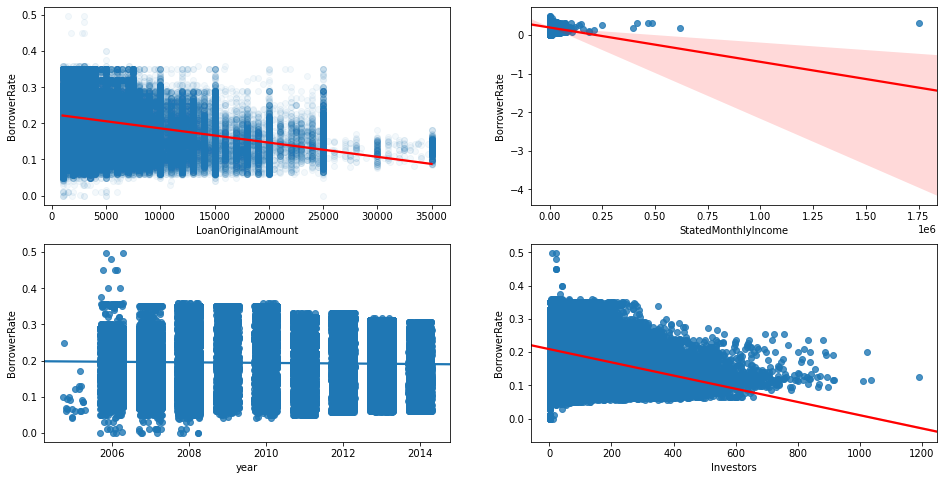

In [5]:
plt.figure(figsize = [16,8])  


plt.subplot(2,2,1)
sns.regplot(data = df_loan, y = 'BorrowerRate', x='LoanOriginalAmount',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})

plt.subplot(2,2,2)
sns.regplot(data = df_loan, y = 'BorrowerRate', x='StatedMonthlyIncome', truncate=False,
             line_kws={'color': 'red'})

plt.subplot(2,2,3)
sns.regplot(data = df_loan, x = 'year', y = 'BorrowerRate', truncate=False, x_jitter=0.3)

plt.subplot(2,2,4)
sns.regplot(data = df_loan, x = 'Investors', y = 'BorrowerRate', truncate=False,
           line_kws={'color': 'red'});

## Correlation between borrower's rate and other numerical variables

> It was actually surprising to see that BorrowerRate has a negative correlation with LoanOriginalAmount and weak correlation with Loan Term.

In [6]:
numeric_cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeLower',
               'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'LoanOriginalAmount',
               'MonthlyLoanPayment', 'Investors']

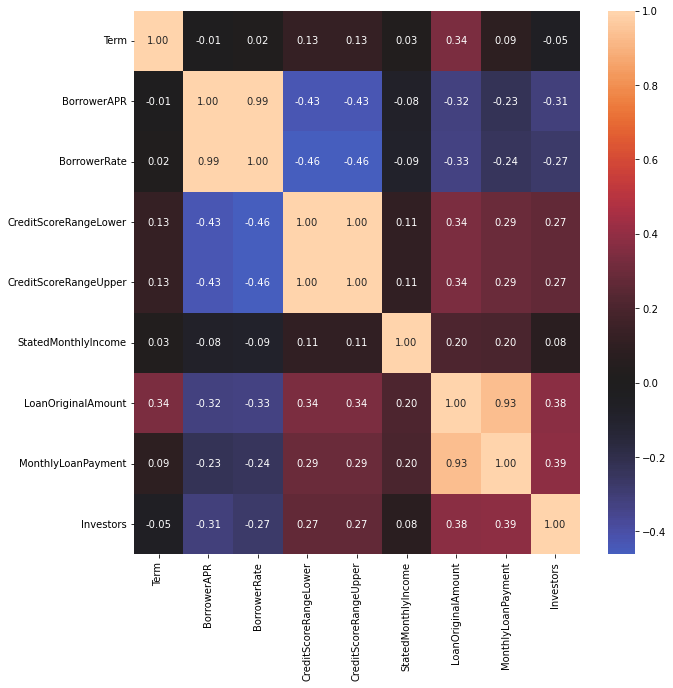

In [7]:
# correlation plot
plt.figure(figsize = [10, 10])
sns.heatmap(df_loan[numeric_cols].corr(), annot = True, fmt = '.2f', center = 0)
plt.show()

In [ ]:
!jupyter nbconvert Part_II_prosper_loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_prosper_loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 830696 bytes to Part_II_prosper_loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_prosper_loan_slide_deck.slides.html
Use Control-C to stop this server
